# OVERVIEW

In [0]:
#import numpy and pandas
import numpy as np
import pandas as pd

from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [0]:
#read data
burgerstar = pd.read_csv('/burgerstarall.csv')
burgerstar.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


In [0]:
burgerstar['type'] = burgerstar[['Type Burger','Type Drink','Payment']].values.tolist()
burgerstar['type'].head()

0                 [Beef burger, Mineral water, DANA]
1                        [Cheese burger, Coke, DANA]
2    [Double cheese burger, Mineral water, LINK AJA]
3                      [Chicken burger, Coffe, DANA]
4                        [Cheese burger, Coke, DANA]
Name: type, dtype: object

## **ASSOCIATION RULE**

In [0]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.05)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Beef burger),(Coffe),0.371795,0.282051,0.089744,0.241379,0.855799,-0.015122,0.946387
1,(Coffe),(Beef burger),0.282051,0.371795,0.089744,0.318182,0.855799,-0.015122,0.921368
2,(Beef burger),(Coke),0.371795,0.221154,0.041667,0.112069,0.506747,-0.040557,0.877147
3,(Coke),(Beef burger),0.221154,0.371795,0.041667,0.188406,0.506747,-0.040557,0.774038
4,(Beef burger),(DANA),0.371795,0.205128,0.060897,0.163793,0.798491,-0.015368,0.950568


In [0]:
oht = OnehotTransactions()
oht_array = oht.fit(burgerstar['type']).transform(burgerstar['type'])
burgerstar1 = pd.DataFrame(oht_array, columns=oht.columns_)
burgerstar1.head() 

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


,Beef burger,Cheese burger,Chicken burger,Coffe,Coke,DANA,Double cheese burger,GOPAY,LINK AJA,Mineral water,None,OVO,TUNAI
0,True,False,False,False,False,True,False,False,False,True,False,False,False
1,False,True,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,True,True,False,False,False
3,False,False,True,True,False,True,False,False,False,False,False,False,False
4,False,True,False,False,True,True,False,False,False,False,False,False,False


In [0]:
frequent_itemsets = apriori(burgerstar1, min_support=0.005, use_colnames=True)
freq = frequent_itemsets.sort_values(by='support', ascending=True)
freq.head(20)

,support,itemsets
76,0.006410,"(Beef burger, None, OVO)"
94,0.006410,"(GOPAY, Double cheese burger, Coffe)"
66,0.006410,"(GOPAY, Beef burger, Coke)"
69,0.009615,"(Beef burger, Coke, TUNAI)"
63,0.009615,"(GOPAY, Beef burger, Coffe)"
86,0.012821,"(Chicken burger, Coffe, OVO)"
73,0.012821,"(None, Beef burger, LINK AJA)"
96,0.012821,"(Double cheese burger, Coffe, OVO)"
68,0.012821,"(Beef burger, Coke, OVO)"
93,0.012821,"(DANA, Double cheese burger, Coffe)"


## **KNN**

In [0]:
#encode
from sklearn.preprocessing import LabelEncoder
burgerstar['target'] = LabelEncoder().fit_transform(burgerstar['Payment'])
burgerstar.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,type,target
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,"[Beef burger, Mineral water, DANA]",0
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,"[Cheese burger, Coke, DANA]",0
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,"[Double cheese burger, Mineral water, LINK AJA]",2
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,"[Chicken burger, Coffe, DANA]",0
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,"[Cheese burger, Coke, DANA]",0


## **Visualization**

In [0]:
## coba
import seaborn as sns
import matplotlib.pyplot as plt

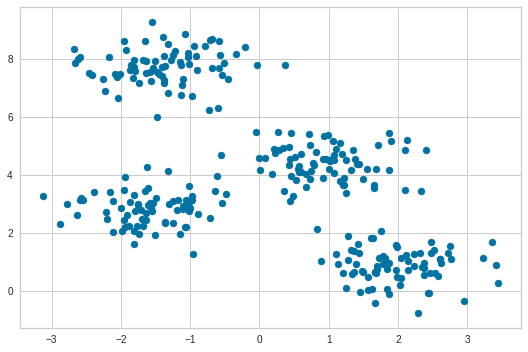

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [0]:
#filter by typepayment
databurger = burgerstar[burgerstar['Payment'] =='DANA']
topburgerbasedonpayment = databurger.sort_values('Amount Burger',ascending=False).head()

In [0]:
burgerstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 11 columns):
Timestamp        312 non-null object
Type Burger      312 non-null object
Code Burger      312 non-null int64
Amount Burger    312 non-null int64
Type Drink       312 non-null object
Code Drink       312 non-null int64
Amount Drink     312 non-null int64
Gender           312 non-null int64
Payment          312 non-null object
type             312 non-null object
target           312 non-null int64
dtypes: int64(6), object(5)
memory usage: 26.9+ KB


### **Bar Plot**

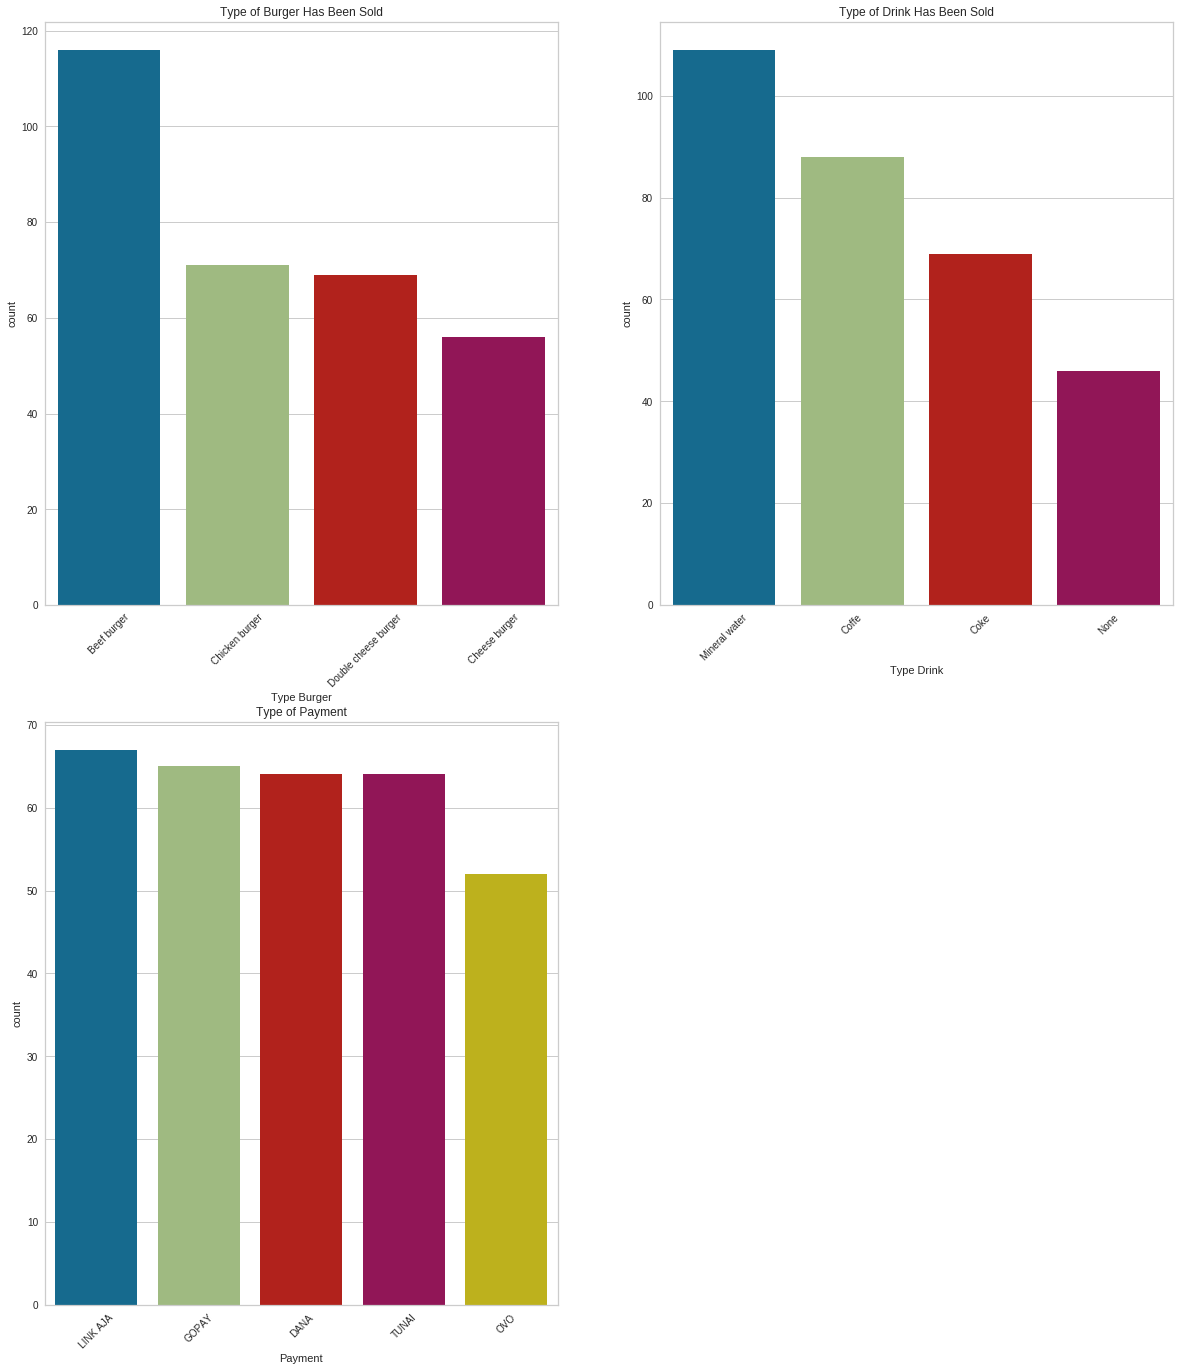

In [0]:
fig=plt.figure(figsize=(18,22))

#plt.show()
fig.add_subplot(2,2,1)
ax = sns.countplot(x='Type Burger',data=burgerstar,order=burgerstar['Type Burger'].value_counts().index[:15])
locs, labels = plt.xticks();
plt.setp(labels, rotation=45);
ax.set_title("Type of Burger Has Been Sold");

fig.add_subplot(2,2,2)
ax = sns.countplot(x='Type Drink',data=burgerstar,order=burgerstar['Type Drink'].value_counts().index[:10])
locs, labels = plt.xticks();
plt.setp(labels, rotation=45);
ax.set_title("Type of Drink Has Been Sold");

fig.add_subplot(2,2,3)
ax = sns.countplot(x='Payment',data=burgerstar,order=burgerstar['Payment'].value_counts().index[:15])
locs, labels = plt.xticks();
plt.setp(labels, rotation=45);
ax.set_title("Type of Payment");

## **PREDICTION**

### **Numerical and Categorical**

In [0]:
numerical_columns = [col for col in burgerstar.columns if (burgerstar[col].dtype=='int64' or burgerstar[col].dtype=='float64') and col != 'Exited']
numerical_columns

['Code Burger',
 'Amount Burger',
 'Code Drink',
 'Amount Drink',
 'Gender',
 'target']

In [0]:
burgerstar[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,Code Burger,Amount Burger,Code Drink,Amount Drink,Gender,target
min,1.00,1.00,0.000000,0.000000,0.000000,0.000000
max,4.00,12.00,3.000000,10.000000,1.000000,4.000000
mean,2.25,6.25,1.637821,3.913462,0.451923,1.958333
50%,2.00,6.00,2.000000,3.000000,0.000000,2.000000


### **Prediksi Payment Channel for Cashback**

In [0]:
burgerstar[burgerstar['Amount Burger'] == burgerstar['Amount Burger'].min()].head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,type,target
16,10:33,Beef burger,1,1,Mineral water,1,1,1,GOPAY,"[Beef burger, Mineral water, GOPAY]",1
17,10:37,Beef burger,1,1,Coffe,3,1,1,DANA,"[Beef burger, Coffe, DANA]",0
18,10:38,Beef burger,1,1,Coffe,3,1,1,LINK AJA,"[Beef burger, Coffe, LINK AJA]",2
24,10:49,Beef burger,1,1,None,0,1,0,OVO,"[Beef burger, None, OVO]",3
36,11:19,Beef burger,1,1,Coffe,3,1,1,LINK AJA,"[Beef burger, Coffe, LINK AJA]",2


In [0]:
#percentage customer for payment channel
percentages = []
for pym in list(burgerstar["Payment"].unique()):
    
    p = round((burgerstar["Type Burger"][burgerstar["Payment"]==pym].value_counts()[1]/burgerstar["Type Burger"][burgerstar["Payment"]==pym].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(pym,"(% to payment) : ", p)

DANA (% to payment) :  26.56
LINK AJA (% to payment) :  23.88
GOPAY (% to payment) :  27.69
TUNAI (% to payment) :  23.44
OVO (% to payment) :  25.0


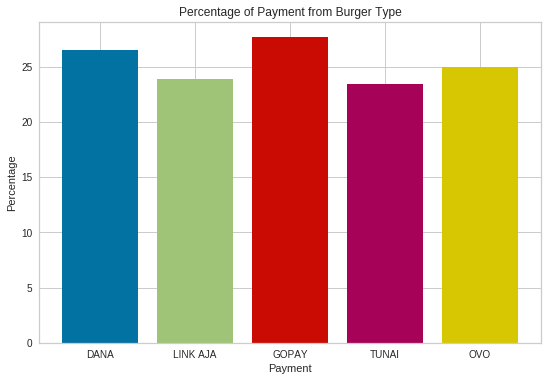

In [0]:
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.bar(2, percentages[2])
plt.bar(3, percentages[3])
plt.bar(4, percentages[4])
plt.xticks((0,1,2,3,4), ('DANA','LINK AJA', 'GOPAY', 'TUNAI', 'OVO'))
plt.xlabel("Payment")
plt.ylabel("Percentage")
plt.title("Percentage of Payment from Burger Type")
plt.show()

In [0]:
#percentage customer for Drink Type payment channel 
percentages1 = []
for pymd in list(burgerstar["Payment"].unique()):
    
    pd = round((burgerstar["Type Drink"][burgerstar["Payment"]==pymd].value_counts()[1]/burgerstar["Type Drink"][burgerstar["Payment"]==pymd].value_counts().sum())*100 , 2)
    percentages1.append(pd)
    print(pymd,"(% to payment for Type Drink) : ", pd)

DANA (% to payment for Type Drink) :  29.69
LINK AJA (% to payment for Type Drink) :  28.36
GOPAY (% to payment for Type Drink) :  20.0
TUNAI (% to payment for Type Drink) :  25.0
OVO (% to payment for Type Drink) :  32.69


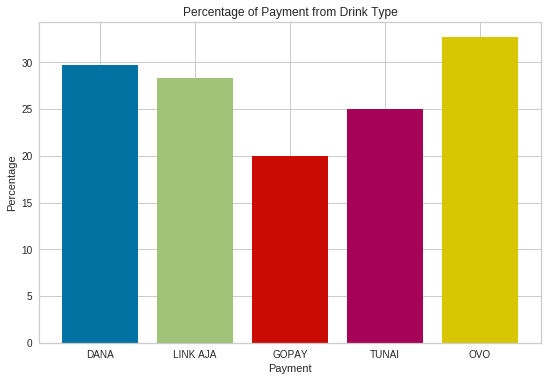

In [0]:
plt.bar(0, percentages1[0])
plt.bar(1, percentages1[1])
plt.bar(2, percentages1[2])
plt.bar(3, percentages1[3])
plt.bar(4, percentages1[4])
plt.xticks((0,1,2,3,4), ('DANA','LINK AJA', 'GOPAY', 'TUNAI', 'OVO'))
plt.xlabel("Payment")
plt.ylabel("Percentage")
plt.title("Percentage of Payment from Drink Type")
plt.show()

## **TIME SERIES ANALYSIS PLOT**

In [0]:
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from sys import stdout

In [0]:
time = burgerstar.set_index('Timestamp')
time.index

Index(['10:01', '10:04', '10:05', '10:06', '10:07', '10:08', '10:09', '10:11',
       '10:12', '10:16',
       ...
       '21:34', '21:37', '21:39', '21:41', '21:44', '21:47', '21:50', '21:53',
       '21:55', '21:57'],
      dtype='object', name='Timestamp', length=312)

In [0]:
burgerstar['column_new'] = burgerstar['Timestamp'].str.split(':')
burgerstar.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,type,target,column_new
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,"[Beef burger, Mineral water, DANA]",0,"[10, 01]"
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,"[Cheese burger, Coke, DANA]",0,"[10, 04]"
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,"[Double cheese burger, Mineral water, LINK AJA]",2,"[10, 05]"
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,"[Chicken burger, Coffe, DANA]",0,"[10, 06]"
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,"[Cheese burger, Coke, DANA]",0,"[10, 07]"


In [0]:
def get_part_of_day(time = burgerstar.set_index('Timestamp')):
    return (
        "morning" if 5 <= time <= 11
        else
        "afternoon" if 12 <= time <= 17
        else
        "evening" if 18 <= time <= 22
        else
        "night"
    )

In [0]:
for h in range(0, 24):
    stdout.write('hour {0} is {1}\n'.format(h, get_part_of_day(h)))

hour 0 is night
hour 1 is night
hour 2 is night
hour 3 is night
hour 4 is night
hour 5 is morning
hour 6 is morning
hour 7 is morning
hour 8 is morning
hour 9 is morning
hour 10 is morning
hour 11 is morning
hour 12 is afternoon
hour 13 is afternoon
hour 14 is afternoon
hour 15 is afternoon
hour 16 is afternoon
hour 17 is afternoon
hour 18 is evening
hour 19 is evening
hour 20 is evening
hour 21 is evening
hour 22 is evening
hour 23 is night


In [0]:
import pandas as pd
time = pd.to_datetime(burgerstar['Timestamp'])
burgerstar['Timestamp2'] = pd.DataFrame(time.dt.hour)
hourtime = burgerstar
hourtime['Timestamp3'] = np.where(hourtime['Timestamp2'] >= 18, 'Malam', 'Siang')
hourtime.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment,type,target,column_new,Timestamp2,Timestamp3
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA,"[Beef burger, Mineral water, DANA]",0,"[10, 01]",10,Siang
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA,"[Cheese burger, Coke, DANA]",0,"[10, 04]",10,Siang
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA,"[Double cheese burger, Mineral water, LINK AJA]",2,"[10, 05]",10,Siang
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA,"[Chicken burger, Coffe, DANA]",0,"[10, 06]",10,Siang
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA,"[Cheese burger, Coke, DANA]",0,"[10, 07]",10,Siang


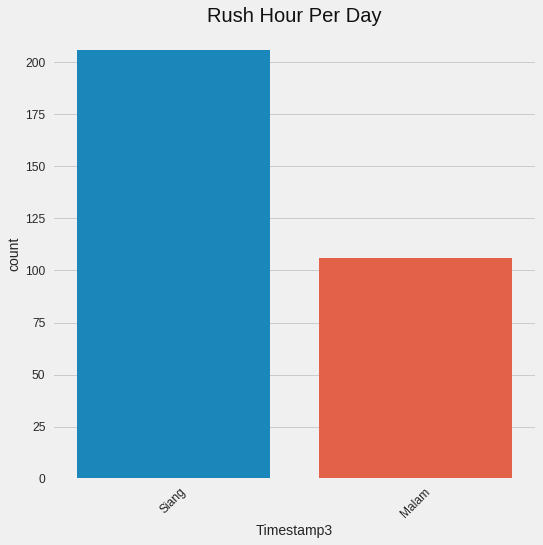

In [0]:
fig=plt.figure(figsize=(17,17))

#plt.show()
fig.add_subplot(2,2,1)
ax = sns.countplot(x='Timestamp3',data=burgerstar,order=burgerstar['Timestamp3'].value_counts().index[:15])
locs, labels = plt.xticks();
plt.setp(labels, rotation=45);
ax.set_title("Rush Hour Per Day");